In [1]:
import sys
sys.path.append("../../")
from cell_builder import L5_seg_cell_builder, L5_orig_cell_builder

from act.cell_model import ACTCellModel
from act.simulator import ACTSimulator
from act.types import SimulationParameters, ConstantCurrentInjection
from act.passive import ACTPassiveModule
from act.data_processing import get_summary_features

import matplotlib.pyplot as plt
import numpy as np
from act.types import SimulationParameters, ConstantCurrentInjection, OptimizationParameters, ConductanceOptions, FilterParameters

import act.data_processing as dp

### Get the cell area

In [ ]:
seg_cell = ACTCellModel(
    cell_name = None,
    path_to_hoc_file = None,
    path_to_mod_files = "../../data/L5/seg_tuned/modfiles/",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = ["gbar_Nap", "gbar_K_T", "gbar_NaTa", "gbar_Kd", "gbar_Ca_LVA", "gbar_Ca_HVA", "gbar_Kv2like", "gbar_Kv3_1"]
)

seg_cell.set_custom_cell_builder(L5_seg_cell_builder)

sim_params = SimulationParameters(
    sim_name = "L5_seg", 
    sim_idx = 1, 
    h_celsius = 37,
    verbose = True, 
    CI = [ConstantCurrentInjection(amp = -0.1, dur = 200, delay = 100)])

simulator = ACTSimulator(output_folder_name = "output")
simulator.submit_job(
    seg_cell,
    sim_params
)
simulator.run_jobs(1)


        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Setting g_pas to 0.00083376 in soma
Setting e_pas to -60.501 in soma
Setting g_pas to 0.00928766 in axon
Setting e_pas to -61.4849 in axon
Setting g_pas to 0.00140526 in apic
Setting e_pas to -80.0882 in apic
Setting g_pas to 5.71849e-05 in dend
Setting e_pas to -65.1148 in dend
Setting cm to 3.56803 in soma
Setting Ra to 131.026 in soma
Setting cm to 6.72363 in axon
Setting Ra to 113.282 in axon
Setting cm to 9.89109 in apic
Setting Ra to 80.0605 in apic
Setting cm to 5.67721 in dend
Setting Ra to 88.3083 in dend
Adding mechanism K_T to soma
Setting gbar_K_T to 0.000540302 in soma
Adding mechanism Kd to soma
Setting gbar_Kd to 0.000951294 in soma
Adding mechanism Kv2like to soma
Setting gbar_Kv2like to 0.0686615 in soma
Adding mechanism NaTa to soma
Setting gbar_NaTa to 0.0173416 in soma
Adding mechanism Nap to soma
Setting gbar_Nap to 0.0173416 in s

In [579]:
computed_soma_area = 6.802158872916739e-06 # (cm2)
computed_total_area = 5.2523997815020434e-05 # (cm2)

### Set target PP

In [580]:
# Target (L5 from a mouse)
# https://celltypes.brain-map.org/experiment/electrophysiology/599393756

target_rheobase = 190 # pA
target_tau = 26.6 * 1e-3 # (s)
target_R_in = 167 * 1e6 # Ohm
target_V_rest = -71.7 # mV

I = [150, 190, 230, 270, 330]
F = [0, 7, 12, 15, 21]

In [581]:
ACTPassiveModule.compute_spp(target_R_in, computed_total_area * 3, target_tau, target_V_rest)

SettablePassiveProperties(Cm=1.0108486517388842, g_bar_leak=3.8001829012740004e-05, e_rev_leak=-71.7, g_bar_h=None)

In [62]:
# Target summary features
sf = get_summary_features(np.zeros((5, 10)), np.zeros((5, 10)))
sf['spike_frequency'] = [0, 7, 12, 15, 21]
sf['mean_i'] = np.array([150, 190, 230, 270, 330]) / 1000

for f in ["mean_v", "std_v", "max_ampl_v", "n_spikes", "main_freq", "std_i"]:
    sf[f] = np.nan
sf.to_csv("target_sf.csv", index = False)

### Tune PP

In [858]:
seg_cell = ACTCellModel(
    cell_name = None,
    path_to_hoc_file = None,
    path_to_mod_files = "../../data/L5/seg_tuned/modfiles/",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = ["gbar_Nap", "gbar_K_T", "gbar_NaTa", "gbar_Kd", "gbar_Ca_LVA", "gbar_Ca_HVA", "gbar_Kv2like", "gbar_Kv3_1"]
)

seg_cell.set_custom_cell_builder(L5_seg_cell_builder)

sim_params = SimulationParameters(
    sim_name = "L5_seg", 
    sim_idx = 1, 
    h_celsius = 37,
    verbose = False,
    h_tstop = 1000,
    CI = [ConstantCurrentInjection(amp = -0.1, dur = 700, delay = 100)])

simulator = ACTSimulator(output_folder_name = "output")
simulator.submit_job(
    seg_cell,
    sim_params
)
simulator.run_jobs(1)


        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Setting g_pas to 0.000171008 in soma
Setting e_pas to -71.7 in soma
Setting g_pas to 0.000171008 in axon
Setting e_pas to -71.7 in axon
Setting g_pas to 0.000171008 in apic
Setting e_pas to -71.7 in apic
Setting g_pas to 0.000171008 in dend
Setting e_pas to -71.7 in dend
Setting cm to 1.01085 in soma
Setting Ra to 131.026 in soma
Setting cm to 1.01085 in axon
Setting Ra to 113.282 in axon
Setting cm to 1.01085 in apic
Setting Ra to 80.0605 in apic
Setting cm to 1.01085 in dend
Setting Ra to 88.3083 in dend
Adding mechanism K_T to soma
Setting gbar_K_T to 0.000540302 in soma
Adding mechanism Kd to soma
Setting gbar_Kd to 0.000951294 in soma
Adding mechanism Kv2like to soma
Setting gbar_Kv2like to 0.0686615 in soma
Adding mechanism NaTa to soma
Setting gbar_NaTa to 0.0173416 in soma
Adding mechanism Nap to soma
Setting gbar_Nap to 0.0173416 in soma
Addi

In [859]:
# Get PP
passive_trace = np.load("output/L5_seg/out_1.npy")[:, 0]
seg_gpp = ACTPassiveModule.compute_gpp(passive_trace, dt = 0.1, I_t_start = 100, I_t_end = 700, I_amp = -0.1)
seg_gpp

GettablePassiveProperties(R_in=169.04155867370633, tau1=5.1000000000000005, tau2=70.10000000000001, sag_ratio=0.010980251266292403, V_rest=-71.90341766067336)

In [857]:
# Make g-pas a little bit higher
3.8001829012740004e-05 * 4.5

0.00017100823055733

### Optimize

In [ ]:
# Add a text blobs on files to run

### Get the FI curve the original cell downloaded from ADB

In [158]:
cell = ACTCellModel(
    cell_name = None,
    path_to_hoc_file = None,
    path_to_mod_files = "../../data/L5/orig/modfiles/",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = ["gbar_Nap", "gbar_K_T", "gbar_NaTa", "gbar_Kd", "gbar_Ca_LVA", "gbar_Ca_HVA", "gbar_Kv2like", "gbar_Kv3_1"]
)

cell.set_custom_cell_builder(L5_orig_cell_builder)

In [159]:
# Set simulations
simulator = ACTSimulator(output_folder_name = "output")

for sim_idx, amp_value in enumerate(np.array([150, 190, 230, 270, 330]) / 1000):
    sim_params = SimulationParameters(
        sim_name = "L5_orig",
        sim_idx = sim_idx,
        h_celsius = 37,
        h_dt = 0.1,
        h_tstop = 1000,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 700, delay = 100)])

    simulator.submit_job(cell, sim_params)

simulator.run_jobs(3)

# Combine simulated traces into one dataset for convenience
dp.combine_data("output/L5_orig")


        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Setting g_pas to 0.00083376 in soma
Setting e_pas to -60.501 in soma
Setting g_pas to 0.00928766 in axon
Setting e_pas to -61.4849 in axon
Setting g_pas to 0.00140526 in apic
Setting e_pas to -80.0882 in apic
Setting g_pas to 5.71849e-05 in dend
Setting e_pas to -65.1148 in dend
Setting cm to 3.56803 in soma
Setting Ra to 131.026 in soma
Setting cm to 6.72363 in axon
Setting Ra to 113.282 in axon
Setting cm to 9.89109 in apic
Setting g_pas to 0.00083376 in soma
Setting Ra to 80.0605 in apic
Setting e_pas to -60.501 in soma
Setting g_pas to 0.00928766 in axon
Setting e_pas to -61.4849 in axon
Setting g_pas to 0.00140526 in apic
Setting cm to 5.67721 in dend
Setting Ra to 88.3083 in dend
Setting e_pas to -80.0882 in apic
Adding mechanism K_T to soma
Setting g_pas to 5.71849e-05 in dend
Setting e_pas to -65.1148 in dend
Setting cm to 3.56803 in soma
Sett

ValueError: argument not a density mechanism name.

In [ ]:
orig_data = np.load("output/L5_orig/combined_out.npy")

f_orig = []
for trace_id in range(len(orig_data)):
    f_orig.append(len(dp.find_events(orig_data[trace_id, ::10, 0].flatten())) / 700 * 1000)

In [ ]:
f_orig

[1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286,
 1.4285714285714286]

### Evaluate

In [405]:
seg_cell = ACTCellModel(
    cell_name = None,
    path_to_hoc_file = None,
    path_to_mod_files = "../../data/L5/seg_tuned/modfiles/",
    passive = ["g_pas", "e_pas", "gbar_Ih"],
    active_channels = ["gbar_Nap", "gbar_K_T", "gbar_NaTa", "gbar_Kd", "gbar_Ca_LVA", "gbar_Ca_HVA", "gbar_Kv2like", "gbar_Kv3_1"]
)

seg_cell.set_custom_cell_builder(L5_seg_cell_builder)

In [406]:
# Set simulations
simulator = ACTSimulator(output_folder_name = "output")

for sim_idx, amp_value in enumerate(np.array([150, 190, 230, 270, 330]) / 1000):
    sim_params = SimulationParameters(
        sim_name = "L5_after_ACT",
        sim_idx = sim_idx,
        h_celsius = 37,
        h_dt = 0.1,
        h_tstop = 1200,
        CI = [ConstantCurrentInjection(amp = amp_value, dur = 1000, delay = 100)])

    simulator.submit_job(seg_cell, sim_params)

simulator.run_jobs(3)

# Combine simulated traces into one dataset for convenience
dp.combine_data("output/L5_after_ACT")


        ACTSimulator (2025)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Setting g_pas to 0.000171008 in soma
Setting e_pas to -71.7 in soma
Setting g_pas to 0.000171008 in axon
Setting e_pas to -71.7 in axon
Setting g_pas to 0.000171008 in apic
Setting g_pas to 0.000171008 in soma
Setting e_pas to -71.7 in soma
Setting g_pas to 0.000171008 in axon
Setting e_pas to -71.7 in axon
Setting e_pas to -71.7 in apic
Setting g_pas to 0.000171008 in apic
Setting g_pas to 0.000171008 in dend
Setting e_pas to -71.7 in apic
Setting e_pas to -71.7 in dend
Setting g_pas to 0.000171008 in dend
Setting cm to 1.01085 in soma
Setting Ra to 131.026 in soma
Setting e_pas to -71.7 in dend
Setting cm to 1.01085 in axon
Setting Ra to 113.282 in axon
Setting cm to 1.01085 in apic
Setting cm to 1.01085 in soma
Setting Ra to 131.026 in soma
Setting cm to 1.01085 in axon
Setting Ra to 80.0605 in apicSetting Ra to 113.282 in axon

Setting cm to 1.010

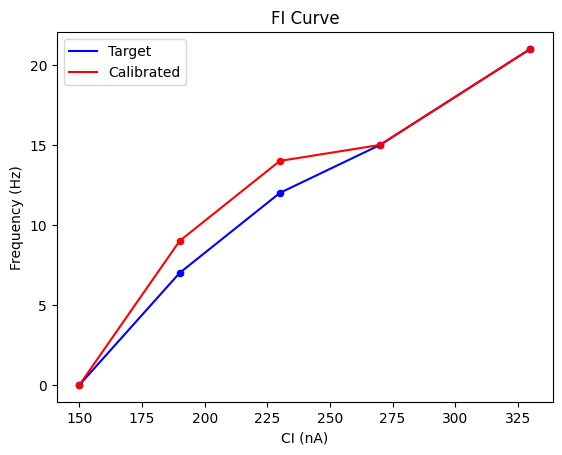

In [415]:
I = np.array([150, 190, 230, 270, 330])

# Calibrated
simulated_data = np.load("output/L5_after_ACT/combined_out.npy")

f = []
for trace_id in range(len(simulated_data)):
    f.append(len(dp.find_events(simulated_data[trace_id, ::10, 0].flatten(), 5)))
# ---

F = [0, 7, 12, 15, 21]
plt.plot(I, F, label = "Target", c = 'blue')
plt.scatter(I, F, c = 'blue', s = 20)

# plt.plot(I, f_orig, label = "Before calibration", c = 'gray')
# plt.scatter(I, f_orig, c = 'gray', s = 20)

plt.plot(I, f, label = "Calibrated", c = 'red')
plt.scatter(I, f, c = 'red', s = 20)

plt.xlabel("CI (nA)")
plt.ylabel("Frequency (Hz)")
plt.title("FI Curve")

plt.legend()

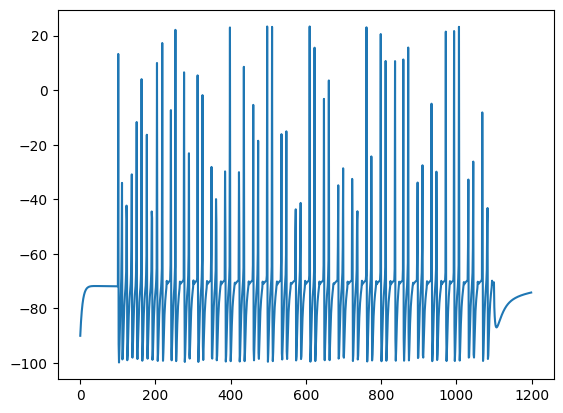

In [416]:
plt.plot(simulated_data[-1, ::10, 0])

In [417]:
f

[0, 9, 14, 15, 21]